We will need to do the following:

Import our dependencies and initialize counters and an empty list that will hold the weather data.
Loop through the cities list.
Group the cities in sets of 50 to log the process as we find the weather data for each city.
Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
Build the city_url or endpoint for each city.
Log the URL and the record and set numbers.
Make an API request for each city.
Parse the JSON weather data for the following:
City, country, and date
Latitude and longitude
Maximum temperature
Humidity
Cloudiness
Wind speed
Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [79]:
#add Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import timeit
import requests
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [35]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)
    
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [36]:
cities
    

['cockburn town', 'gat', 'parvatsar', 'punta arenas', 'saint george']

In [56]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city = "Boston" 
city_url = url + "&q=" + "Boston"
weather_response = requests.get(city_url)
if weather_response.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [61]:
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 70.68,
  'feels_like': 71.64,
  'temp_min': 67.73,
  'temp_max': 73.62,
  'pressure': 1018,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 152, 'gust': 8.01},
 'clouds': {'all': 40},
 'dt': 1632448325,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632393172,
  'sunset': 1632436812},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [62]:
# Get the JSON data.
boston_data = weather_response.json()

In [70]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 73.62 89 40 1.01


In [74]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-24 01:52:05'

In [80]:


lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [81]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [82]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [83]:
#Empty city_data list
city_data = []
print('Log Start')
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Log Start
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | feijo
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | caconda
Processing Record 7 of Set 1 | idil
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | bonthe
Processing Record 18 of Set 1 | sistranda
Processing Record 19 of Set 1 | seminole
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | caiaponia
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | san cristobal
Processing Record 24 of Set 1 | alic

Processing Record 39 of Set 4 | grand-lahou
Processing Record 40 of Set 4 | camapua
Processing Record 41 of Set 4 | teya
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | najran
Processing Record 45 of Set 4 | ayan
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | kismayo
Processing Record 48 of Set 4 | darhan
Processing Record 49 of Set 4 | manzanillo
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | zyryanka
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | elko
Processing Record 4 of Set 5 | nishihara
Processing Record 5 of Set 5 | kautokeino
Processing Record 6 of Set 5 | buzmeyin
Processing Record 7 of Set 5 | ust-tarka
Processing Record 8 of Set 5 | havoysund
Processing Record 9 of Set 5 | thompson
Processing Record 10 of Set 5 | biograd na moru
Processing Record 11 of Set 5 | port lincoln
Processing Record 12 of Set 5 | swinoujscie
Processing Record 13 

Processing Record 30 of Set 8 | ostrovnoy
Processing Record 31 of Set 8 | sarahan
Processing Record 32 of Set 8 | wajima
Processing Record 33 of Set 8 | saryg-sep
Processing Record 34 of Set 8 | urucara
Processing Record 35 of Set 8 | diamantino
Processing Record 36 of Set 8 | pryozerne
Processing Record 37 of Set 8 | pacific grove
Processing Record 38 of Set 8 | kingaroy
Processing Record 39 of Set 8 | redmond
Processing Record 40 of Set 8 | oranjemund
Processing Record 41 of Set 8 | lashio
Processing Record 42 of Set 8 | ziro
Processing Record 43 of Set 8 | doha
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | iwanai
Processing Record 46 of Set 8 | khilok
Processing Record 47 of Set 8 | billings
Processing Record 48 of Set 8 | erdaojiang
Processing Record 49 of Set 8 | pisco
Processing Record 50 of Set 8 | kavieng
Processing Record 1 of Set 9 | alta floresta
Processing Record 2 of Set 9 | kokopo
Processing Record 3 of Set 9 | seymchan
Processing Record 4 of S

Processing Record 20 of Set 12 | niquero
Processing Record 21 of Set 12 | birecik
Processing Record 22 of Set 12 | nalut
Processing Record 23 of Set 12 | ekimchan
Processing Record 24 of Set 12 | biloela
Processing Record 25 of Set 12 | jiangkou
Processing Record 26 of Set 12 | zhanaozen
Processing Record 27 of Set 12 | ust-koksa
Processing Record 28 of Set 12 | portland
Processing Record 29 of Set 12 | yima
Processing Record 30 of Set 12 | tehachapi
Processing Record 31 of Set 12 | andenes
Processing Record 32 of Set 12 | mayo
Processing Record 33 of Set 12 | mount darwin
Processing Record 34 of Set 12 | kalmunai
Processing Record 35 of Set 12 | yatou
Processing Record 36 of Set 12 | bergen
Processing Record 37 of Set 12 | broken hill
Processing Record 38 of Set 12 | celestun
Processing Record 39 of Set 12 | sola
Processing Record 40 of Set 12 | tazovskiy
Processing Record 41 of Set 12 | kulhudhuffushi
Processing Record 42 of Set 12 | nouadhibou
Processing Record 43 of Set 12 | huilon

In [88]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2021-09-24 02:30:00,-0.6000,73.0833,79.77,84,100,18.12
1,Muros,ES,2021-09-24 02:30:04,42.7762,-9.0603,64.24,78,100,9.06
2,Feijo,BR,2021-09-24 02:30:04,-8.1642,-70.3536,73.78,87,59,2.53
3,Busselton,AU,2021-09-24 02:30:05,-33.6500,115.3333,60.04,50,0,11.16
4,Torbay,CA,2021-09-24 02:30:06,47.6666,-52.7314,56.75,90,90,6.91


In [89]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

C:\Users\auste\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


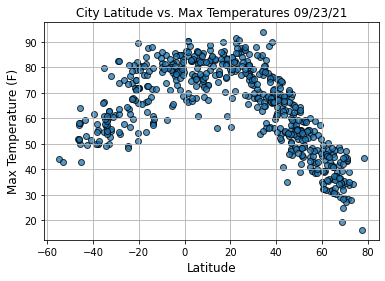

In [107]:
#scatter plot

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')


fig, ax = plt.subplots()
ax.scatter(lats,max_temps, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Max Temperatures ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Max Temperature (F)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

fig.show()

C:\Users\auste\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


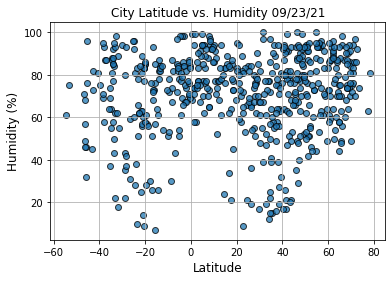

In [109]:
#plot for Lat v Humidity

fig, ax = plt.subplots()
ax.scatter(lats,humidity, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Humidity ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Humidity (%)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

fig.show()

C:\Users\auste\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


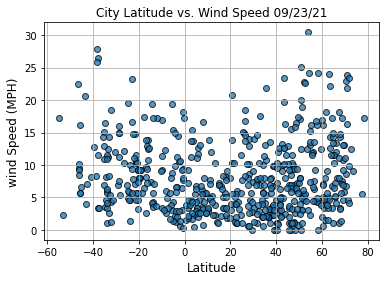

In [111]:
#plot for Lat v Cloudiness
fig, ax = plt.subplots()
ax.scatter(lats, wind_speed, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Wind Speed ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('wind Speed (MPH)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

fig.show()

In [ ]:
#plot for Lat v Wind Speed

fig, ax = plt.subplots()
ax.scatter(lats, cloudiness, edgecolor='black', alpha=.75)
ax.set_title('City Latitude vs. Cloudiness ' + today, fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Cloudiness (%)', fontsize=12)
ax.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

fig.show()